<a href="https://colab.research.google.com/github/mohansivasai/Fashion-MNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#imporing the dependencies
import numpy as  np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn  as sns
from tensorflow import keras
print(tf.__version__)
%matplotlib inline

2.2.0-rc2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#loading the data
fmnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fmnist.load_data()

In [8]:
#EDA
print('no of training images = ',x_train.shape)
print('no of testing images = ',x_test.shape)
x_train.shape

no of training images =  (60000, 28, 28)
no of testing images =  (10000, 28, 28)


(60000, 28, 28)

9
0
0
3


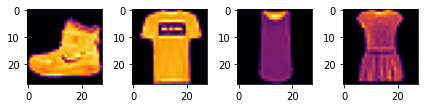

In [25]:
f,ax = plt.subplots(nrows=1,ncols=4)
i = 0
for axes in ax:
  axes.imshow(x_train[i],cmap='inferno')
  print(y_train[i])
  i+=1
plt.tight_layout()
plt.show()

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
#Defining the model
model = tf.keras.Sequential([
                            keras.layers.Flatten(input_shape=(28,28)),
                            keras.layers.Dense(256,activation='relu'),
                            keras.layers.Dense(512,activation='relu'),
                            keras.layers.Dense(10,activation='softmax')
])

In [0]:
#Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
#callbacks
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy') > 0.96:
      print("\n Reached the desired accuracy so stoping the training!")
      self.model.stop_training = True
callback = Callback()

In [60]:
#Training the model
hist = model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,callbacks=[callback])

Epoch 1/10
938/938 [==============================] - 5s 6ms/step - loss: 0.4716 - accuracy: 0.8299
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3558 - accuracy: 0.8700
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3205 - accuracy: 0.8809
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2967 - accuracy: 0.8900
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2757 - accuracy: 0.8965
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2636 - accuracy: 0.9010
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2484 - accuracy: 0.9060
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2378 - accuracy: 0.9098
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2263 - accuracy: 0.9136
Epoch 10/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2161 - accuracy: 0.9179

In [61]:
#evaluationg the model
pred = model.evaluate(x_test,y_test)
print("loss = {}".format(pred[0]))
print('Accuracy on test set = {}'.format(pred[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8885
loss = 0.3413143754005432
Accuracy on test set = 0.8884999752044678


Text(0, 0.5, 'loss')

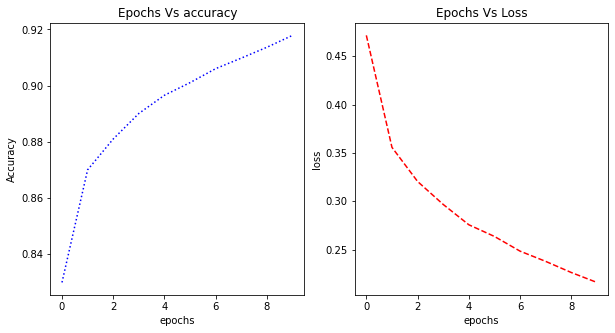

In [62]:
# evaluating the loss and accuracy
acc = hist.history['accuracy']
loss = hist.history['loss']
epochs = hist.epoch
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].plot(epochs,acc,color='blue',ls=':')
ax[0].set_title('Epochs Vs accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Accuracy')
ax[1].plot(epochs,loss,color='red',ls='--')
ax[1].set_title("Epochs Vs Loss")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel("loss")